# Nanodegree Fundamentos de Machine Learning
## Modelo de Avaliação e Validação
## Projeto 1: Estimando Preços dos Imóveis de Boston

Bem-vindo ao primeiro projeto do Nanodegree de Engenheiro de Machine Learning! Neste Notebook, alguns templates de código estão sendo fornecidos para você, e você irá precisar implementar funcionalidades adicionais para completar este projeto com sucesso. Você não vai precisar modificar o código que foi incluído além do que está sendo pedido. Seções que começam com **'Implementação'** no cabeçalho indicam que o bloco de código seguinte vai exigir que você providencie funcionalidade adicional. Instruções serão fornecidas para cada seção e as especificidades da implementação são marcadas no bloco de código com o comando 'TODO'. Não esqueça de ler as instruções atentamente!

Além do código implementado, haverá questões relacionadas com o projeto e sua implementação que você deve responder. Cada seção em que há uma questão para você responder, ela será precedida por **'Questão X'** no cabeçalho. Leia cada questão cuidadosamente e dê respostas completas no seguinte box de texto que contém **'Resposta: '**. O projeto enviado será avaliado com base nas respostas para cada uma das questões e a implementação que você nos forneceu.  

>**Nota:** Células de Código e de Markdown podem ser executadas utilizando o atalho de teclado **Shift + Enter**. Além disso, as células Markdown podem ser editadas ao clicar normalmente duas vezes na célula para entrar no modo de edição.

## Antes de começar
Certifique-se que a sua versão do scikit-learn é a mesma que deve ser utilizada neste notebook. Execute a célula abaixo para verificar se sua versão é a ideal. Se você não quiser fazer *downgrade*, você precisa ficar atento as diferenças citadas ao decorrer do código.

In [21]:
import warnings
warnings.filterwarnings('ignore')
import sklearn
print("A versão do scikit-learn é ", sklearn.__version__)
if sklearn.__version__ >= '0.18':
    print("Tudo certo!")
else:
    print("Você precisa fazer upgrade do scikit-learn ou ficar atento com as diferenças das versões")
    print("Pode ser feito executando:\n")
    print("pip install scikit-learn==0.18.1")

A versão do scikit-learn é  0.18.2
Tudo certo!


## Começando
Neste projeto, você irá avaliar o desempenho e o poder de estimativa de um modelo que foi treinado e testado em dados coletados dos imóveis dos subúrbios de Boston, Massachusetts. Um modelo preparado para esses dados e visto como *bem ajustado* pode ser então utilizado para certas estimativas sobre um imóvel – em particular, seu valor monetário. Esse modelo seria de grande valor para alguém como um agente mobiliário, que poderia fazer uso dessas informações diariamente.

O conjunto de dados para este projeto se origina do [repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Housing). Os dados de imóveis de Boston foram coletados em 1978 e cada uma das 489 entradas representa dados agregados sobre 14 atributos para imóveis de vários subúrbios de Boston. Para o propósito deste projeto, os passos de pré-processamento a seguir foram feitos para esse conjunto de dados:
- 16 observações de dados possuem um valor `'MEDV'` de 50.0. Essas observações provavelmente contêm **valores ausentes ou censurados** e foram removidas.
- 1 observação de dados tem um valor `'RM'` de 8.78. Essa observação pode ser considerada **valor atípico (outlier)** e foi removida.
- Os atributos `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` são essenciais. O resto dos **atributos irrelevantes** foram excluídos.
- O atributo `'MEDV'` foi **escalonado multiplicativamente** para considerar 35 anos de inflação de mercado.

** Execute a célula de código abaixo para carregar o conjunto dos dados dos imóveis de Boston, além de algumas bibliotecas de Python necessárias para este projeto. Você vai saber que o conjunto de dados carregou com sucesso se o seu tamanho for reportado. **

In [22]:
# Importar as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Formatação mais bonita para os notebooks
%matplotlib inline

# Executar o conjunto de dados de imóveis de Boston
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Êxito
print("O conjunto de dados de imóveis de Boston tem {} pontos com {} variáveis em cada.".format(*data.shape))

O conjunto de dados de imóveis de Boston tem 489 pontos com 4 variáveis em cada.


## Explorando os Dados
Na primeira seção deste projeto, você fará uma rápida investigação sobre os dados de imóveis de Boston e fornecerá suas observações. Familiarizar-se com os dados durante o processo de exploração é uma prática fundamental que ajuda você a entender melhor e justificar seus resultados.

Dado que o objetivo principal deste projeto é construir um modelo de trabalho que tem a capacidade de estimar valores dos imóveis, vamos precisar separar os conjuntos de dados em **atributos** e **variável alvo**. O **atributos**, `'RM'`, `'LSTAT'` e `'PTRATIO'`, nos dão informações quantitativas sobre cada ponto de dado. A **variável alvo**, `'MEDV'`, será a variável que procuramos estimar. Eles são armazenados em `features` e ` prices`, respectivamente.

### Implementação: Calcular Estatísticas
Para a sua primeira implementação de código, você vai calcular estatísticas descritivas sobre preços dos imóveis de Boston. Dado que o `numpy` já foi importado para você, use essa biblioteca para executar os cálculos necessários. Essas estatísticas serão extremamente importantes depois para analisar várias estimativas resultantes do modelo construído.

Na célula de código abaixo, você precisará implementar o seguinte:
- Calcular o mínimo, o máximo, a média, a mediana e o desvio padrão do `'MEDV'`, que está armazenado em `prices`.
  - Armazenar cada cálculo em sua respectiva variável.

In [23]:
# TODO: Preço mínimo dos dados
minimum_price = np.amin(prices)

# TODO: Preço máximo dos dados
maximum_price = np.amax(prices)

# TODO: Preço médio dos dados
mean_price = np.mean(prices)

# TODO: Preço mediano dos dados
median_price = np.median(prices)

# TODO: Desvio padrão do preço dos dados
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print("Estatísticas para os dados dos imóveis de Boston:\n")
print("Preço mínimo: ${:,.2f}".format(minimum_price))
print("Preço máximo: ${:,.2f}".format(maximum_price))
print("Preço médio: ${:,.2f}".format(mean_price))
print("Preço mediano: ${:,.2f}".format(median_price))
print("Desvio padrão dos preços: ${:,.2f}".format(std_price))

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $105,000.00
Preço máximo: $1,024,800.00
Preço médio: $454,342.94
Preço mediano: $438,900.00
Desvio padrão dos preços: $165,171.13


### Questão 1 - Observação de Atributos
Para lembrar, estamos utilizando três atributos do conjunto de dados dos imóveis de Boston: `'RM'`, `'LSTAT'` e `'PTRATIO'`. Para cada observação de dados (vizinhança):
- `'RM'` é o número médio de cômodos entre os imóveis na vizinhança.
- `'LSTAT'` é a porcentagem de proprietários na vizinhança considerados de "classe baixa" (proletariado).
- `'PTRATIO'` é a razão de estudantes para professores nas escolas de ensino fundamental e médio na vizinhança.

**Usando a sua intuição, para cada um dos atributos acima, você acha que um aumento no seu valor poderia levar a um _aumento_ no valor do `'MEDV'` ou uma _diminuição_ do valor do `'MEDV'`? Justifique sua opinião para cada uma das opções.**  

**Dica:** Você pode tentar responder pensando em perguntas como:
* Você espera que um imóvel que tem um valor `'RM'` de 6 custe mais ou menos que um imóvel com valor `'RM'` de 7?
* Você espera que um imóvel em um bairro que tem um valor `'LSTAT'` de 15 custe mais ou menos que em um bairro com valor `'LSTAD'` de 20?
* Você espera que um imóvel em um bairro que tem um valor `'PTRATIO'` de 10 custe mais ou menos que em um bairro com `'PTRATIO'` de 15?

RM: O alto valor dessa variável impacta no aumento do valor do MEDV, pois quanto maior a quantidade de cômodos no imóvel, maior será o valor dele.

LSTAT: O alto valor dessa variável impacta na diminuição do valor do MEDV. Porque é referente a uma região habitada por pessoas consideradas de classe baixa e isso faz com que o valor imovél se equipare com o valor dos demais imóveis da região.

PTRATIO: O alto valor dessa variável impacta na diminuição do valor do MEDV. Porque esse número elevado significa que há muitos alunos para poucos professores, e a maioria das pessoas, principalmente as que possuem filhos em idade escolar, desejam que o filho estude em uma escola em que não haja muitos alunos para cada professor. Pois quanto mais alunos em uma sala de aula, maior é a dificuldade para o professor lecionar e consequentemente do aluno aprender.

----

## Desenvolvendo um Modelo
Na segunda seção deste projeto, você vai desenvolver ferramentas e técnicas necessárias para um modelo que faz estimativas. Ser capaz de fazer avaliações precisas do desempenho de cada modelo através do uso dessas ferramentas e técnicas ajuda a reforçar a confiança que você tem em suas estimativas.

### Implementação: Definir uma Métrica de Desempenho
É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. Para este projeto, você irá calcular o [*coeficiente de determinação*](https://pt.wikipedia.org/wiki/R%C2%B2), R<sup>2</sup>, para quantificar o desempenho do seu modelo. O coeficiente de determinação é uma estatística útil no campo de análise de regressão uma vez que descreve o quão "bom" é a capacidade do modelo em fazer estimativas. 

Os valores para R<sup>2</sup> têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da **variável alvo**. Um modelo R<sup>2</sup> de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R<sup>2</sup> de valor 1, estima perfeitamente a variável alvo. Qualquer valor entre 0 e 1 indica qual a porcentagem da variável alvo (ao utilizar o modelo) que pode ser explicada pelos **atributos**. *Um modelo pode dar também um R<sup>2</sup> negativo, que indica que o modelo não é melhor do que aquele que estima ingenuamente a média da variável alvo.*

Para a função ‘performance_metric’ na célula de código abaixo, você irá precisar implementar o seguinte:
- Utilizar o `r2_score` do `sklearn.metrics` para executar um cálculo de desempenho entre `y_true` e `y_predict`.
- Atribuir a pontuação do desempenho para a variável `score`.

In [24]:
# TODO: Importar 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    
    """ Calcular e retornar a pontuação de desempenho entre 
        valores reais e estimados baseado na métrica escolhida. """
        
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

### Questão 2 - Qualidade do Ajuste
Admita que um conjunto de dados que contém cinco observações de dados e um modelo fez a seguinte estimativa para a variável alvo:

| Valores Reais | Estimativa |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

** Executar a célula de código abaixo para usar a função `performance_metric’ e calcular o coeficiente de determinação desse modelo. **

In [25]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score))

O coeficiente de determinação, R^2, do modelo é 0.923.


* Você consideraria que esse modelo foi capaz de capturar a variação da variável alvo com sucesso? Por que ou por que não?

** Dica: **
* R2 score com valor 0 significa que a variável dependente não pode ser estimada pela variável independente.
* R2 score com valor 1 significa que a variável dependente pode ser estimada pela variável independente.
* R2 score com valor entre 0 e 1 significa quanto a variável dependente pode ser estimada pela variável independente.
* R2 score com valor 0.40 significa que 40 porcento da variância em Y é estimável por X.

**Resposta:** 

Os valores de R2 podem variar de 0 a 1, onde o valor 0 significa que a variável dependente não pode ser estimada pela variável independente. 

No processo de obtenção do Coeficiente de Determinação R2 iniciamos com uma linha que representa um "modelo errado", conhecida como baseline model, uma linha paralela ao eixo X. O baseline utilizará a média dos pontos que representam a variável dependente para fazer a predição dos pontos que representam as variáveis independentes. Ou seja, o baseline seŕa o ponto inicial de onde o modelo será ajustado com base na média da distância das variáveis dependentes.

O R2 score é obtido a partir do seguinte cálculo: 

$$R²=1-\dfrac{SSE}{SST}$$

Onde, SSE representa a soma do quadrado dos erros do modelo de regressão e SST a soma dos quadrado dos erros do baseline. Ou seja, se os erros do modelo de regressão forem baixos o valor subtraído de 1 será pequeno e o score R2 se manterá próximo de 1.

Com base nas informações acima podemos chegar a conclusão de que esse modelo foi capaz de capturar a variação da variável alvo com sucesso! Isso se deve ao fato de que o valor do Coeficiente de Determinção obtido (R<sup>2</sup>), foi de 0.923 e isso mostra que mais de 90% da variância da variável alvo foi capturada pelo modelo.



### Implementação: Misturar e Separar os Dados
Sua próxima implementação exige que você pegue o conjunto de dados de imóveis de Boston e divida os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

Para a célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize `train_test_split` do `sklearn.model_selection` para misturar e dividir os dados de `features` e `prices` em conjuntos de treinamento e teste. Leia mais [aqui](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.train_test_split.html).
  - Divida os dados em 80% treinamento e 20% teste.
  - Mude o `random_state` do `train_test_split` para um valor de sua escolha. Isso garante resultados consistentes.
- Atribuir a divisão de treinamento e teste para X_train`, `X_test`, `y_train` e `y_test`.

In [26]:
# TODO: Importar 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Misturar e separar os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=42)

# Êxito
print("Separação entre treino e teste feita com êxito.")

Separação entre treino e teste feita com êxito.


### Questão 3 - Treinamento e Teste
* Qual o benefício de separar o conjunto de dados em alguma relação de subconjuntos de treinamento e de teste para um algoritmo de aprendizagem?

**Dica:** O que pode dar errado se não houver uma maneira de testar seu modelo?

**Resposta:** 

Os dados/conjuntos de teste são fundamentais para testar os modelos treinados com o intuito de definir qual é o melhor modelo. Tal definição ocorre com base nos dados/conjuntos de teste, métricas e técnicas de avaliação.

Caso não exista uma maneira de treinar os dados, jamais conseguiremos avaliar a acurácia de nosso modelo. Porque sem testar o modelo não saberemos como as cuvas de treinamento e teste se comportam, se o modelo possuí uma tendência de ser underfit ou overfit, entre outras características que podemos observar a partir dos resultados dos testes.

----

## Analisando o Modelo de Desempenho
Na terceira parte deste projeto, você verá o desempenho em aprendizagem e teste de vários modelos em diversos subconjuntos de dados de treinamento. Além disso, você irá investigar um algoritmo em particular com um parâmetro `'max_depth'` (profundidade máxima) crescente, em todo o conjunto de treinamento, para observar como a complexidade do modelo afeta o desempenho. Plotar o desempenho do seu modelo baseado em critérios diversos pode ser benéfico no processo de análise, por exemplo: para visualizar algum comportamento que pode não ter sido aparente nos resultados sozinhos.

### Curvas de Aprendizagem
A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R<sup>2</sup>, o coeficiente de determinação.  

**Execute a célula de código abaixo e utilizar esses gráficos para responder as questões a seguir.**

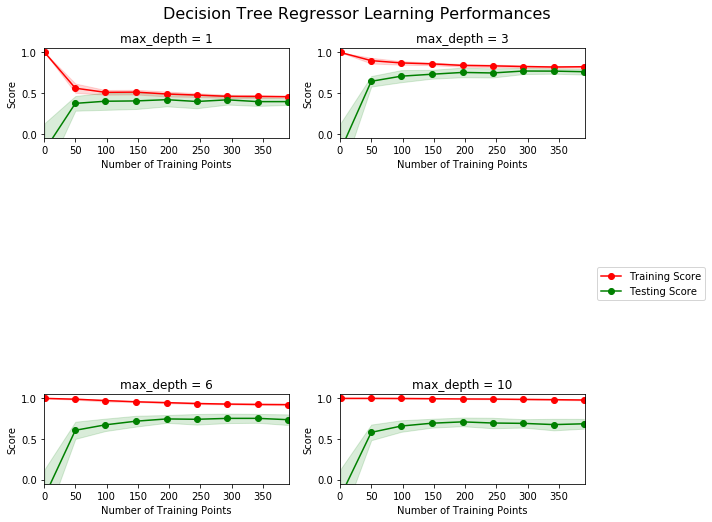

In [27]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e profundidades máximas
vs.ModelLearning(features, prices)

### Questão 4 - Compreendendo os Dados
* Escolha qualquer um dos gráficos acima e mencione a profundidade máxima escolhida.
* O que acontece com a pontuação da curva de treinamento se mais pontos de treinamento são adicionados? E o que acontece com a curva de teste?
* Ter mais pontos de treinamento beneficia o modelo?

**Dica:** As curvas de aprendizagem convergem para uma pontuação em particular? Geralmente, quanto mais dados você tem, melhor. Mas, se sua curva de treinamento e teste estão convergindo com um desempenho abaixo do benchmark, o que seria necessário? Pense sobre os prós e contras de adicionar mais pontos de treinamento baseado na convergência das curvas de treinamento e teste.

**Resposta:**

Para a resposta dessa questão eu escolhi o gráfico de profundidade máxima igual a 3, por acreditar que dos gráficos esse seja o que mais se aproxima da profundidade máxima ideal, que a principio eu acredito que seja 4.

O gráfico de profundidade máxima igual a 3 apresenta uma convergência entre as linhas de treinamento e teste em um ponto alto do score, para uma quantidade razoável de número de pontos de treinamento.

A adição de mais pontos de treinamento nos mostraria mais sobre a tendencia das curvas que em todos os modelos seguem em paralelo após um grande número de pontos serem avaliados.

Ter bastante pontos de treinamento é importante para a precisão dos resultados, mas uma vez identificado que as curvas convergem para um pontuação baixa em relação aos outros modelos, não é necessário adicionar mais dados.

### Curvas de Complexidade
A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a **curva de aprendizagem**, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função `performance_metric`.  

** Execute a célula de código abaixo e utilize o gráfico para responder as duas questões a seguir. **

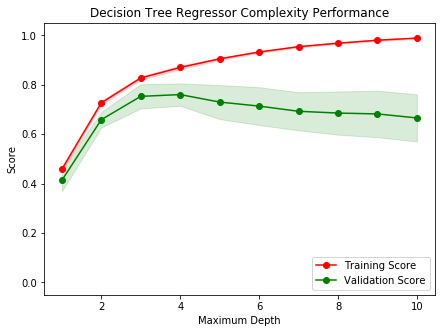

In [28]:
vs.ModelComplexity(X_train, y_train)

### Questão 5 - Equilíbrio entre viés e variância
* Quando o modelo é treinado com o profundidade máxima 1, será que o modelo sofre mais de viés (erro sistemático) ou variância (erro aleatório)?
* E o que acontece quando o modelo é treinado com profundidade máxima 10? Quais pistas visuais existem no gráfico para justificar suas conclusões?

**Dica:** Como você sabe que um modelo está experimentando viés alto ou variância alta? Viés alto é um sinal de *underfitting* (o modelo não é complexo o suficiente para aprender os dados) e alta variância é um sinal de *overfitting* (o modelo está "decorando" os dados e não consegue generalizar bem o problema). Pense em modelos (com profundidade de 1 e 10, por exemplo) e qual deles está alinhado com qual parte do equilíbrio.

**Resposta:**

Quando o modelo é treinado com profundidade máxima 1 ele sofre mais de viés (underfitting). Isso porque ele possui um alto índice de erro tanto de treinamento,
quanto de validação. Esse comportamento ocorre pois o problema é simplificado demais, a ponto de o modelo não conseguir generalizar nem mesmo os dados de treinamento.
                          
Quando o modelo é treinado com profundidade máxima 10 ele sofre mais de variância (overfitting). Podemos verificar esse fato no gráfico, observando o alto índice de erro na curva de validação e o alto índice de acerto na curva de treinamento. Tal comportamento ocorre devido ao fato de o modelo decorar os dados de treinamento, e isso faz com que ele tenha um baixo índice de erro quando utilizamos os dados de treinamento. Porém, quando testamos o modelo com os dados de testes, o índice de erros tende a crescer contínuamente, pois o modelos está totalmente adequado aos dados de treinamento e não consegue generalizar os demais dados.

### Questão 6 - Modelo Ótimo de Melhor Suposição
* Qual profundidade máxima (`'max_depth'`) você acredita que resulta em um modelo que melhor generaliza um dado desconhecido?
* Que intuição te levou a essa resposta?

**Dica: ** Olhe no gráfico acima e veja o desempenho de validação para várias profundidades atribuidas ao modelo. Ele melhora conforme a profundidade fica maior? Em qual ponto nós temos nosso melhor desempenho de validação sem supercomplicar nosso modelo? E lembre-se, de acordo com a [Navalha de Occam](https://pt.wikipedia.org/wiki/Navalha_de_Occam), sempre devemos optar pelo mais simples ao complexo se ele conseguir definir bem o problema.

**Resposta:**

Das profundidades atribuídas ao modelo, a que apresenta melhor desempenho é a de valor 4.

Isso se dá ao fato de que se observarmos atentamente o gráfico, perceberemos que o modelo começa na profundidade máxima de valor 1 e possuí o score igual 0.4 para a curva de validação e um score um pouco maior que 0.4 para a curva de treinamento, e conforme a profundidade aumenta o score de ambas curvas também aumenta e elas seguem crescendo paralelamente.

Já na profundidade máxima de valor 2 o score de validação possuí valor 6 e o de treinamento valor 7, observe que nesse ponto a diferença entre os dois scores aumentou sutilmente.

Até o ponto de profundidade máxima de valor 3 as curvas seguem o mesmo padrão que vinham seguindo até ali, ambas crescendo positivamente e aumentando sutilmente a diferença entre elas. Nesse ponto a curva de validação possuí score um pouco maior do que 7 e a curva de treinamento possuí um score um pouco maior do que 8.

Até o ponto 4 as duas seguiram crescendo, mas a partir desse ponto, somente a curva de treinamento segue crescendo, em contraste com a curva de validação que começa a decrescer. Daí em diante esse comportamente segue sendo um padrão, a curva de treinamento crescendo e a de validação decrescendo.

-----

## Avaliando o Desempenho do Modelo
Nesta parte final do projeto, você irá construir um modelo e fazer uma estimativa de acordo com o conjunto de atributos do cliente utilizando um modelo otimizado a partir de `fit_model`.

### Questão 7 - Busca em Matriz
* O que é a técnica de busca em matriz (*grid search*)?
* Como ela pode ser aplicada para otimizar um algoritmo de aprendizagem?

** Dica: ** Quando explicar a técnica de busca em matriz, tenha certeza que você explicou o motivo dela ser usada, o que a 'matriz' significa nesse caso e qual o objetivo da técnica. Para ter uma resposta mais sólida, você pode também dar exemplo de um parâmetro em um modelo que pode ser otimizado usando essa técnica.

**Resposta:**

Imagine que temos que definir qual o melhor valor de parâmetro para um modelo. Com base nessa questão teremos que de alguma forma comparar os resultados obtidos para saber qual é o melhor valor para um determinado parâmetro. Essa comparação deve ser feita utilizando uma matriz, onde teremos os parâmetros a serem utilizados na definição do modelo, o valor dos parâmetros e score F1 obtido para cada combinação de parâmetro e valor.

Para ilustrar melhor essa técnica suponhamos que queremos descobrir qual o melhor valor para os parâmetros Kernel e Gama de um modelo SVM de classificação. Devemos seguir os seguintes passos para realizar uma busca em matriz:

   * Definiremos as colunas como os possíveis valores para o Kernel. Os valores são Linear e Polinomial
    
   * Definiremos as linhas como os possíveis valores para Gama. É importante que o valores cresçam exponencialmente a cada linha. Em nosso exemplo utilizaremos o valores 0.1, 1 e 10
    
   * Sendo assim, teremos todas as combinações possíveis limitados aos valores de Gama.
    
   * Utilizaremos os dados de treinamento para validar os modelos e a validação cruzada (será explicada na próxima questão) para obter F1 Score
    
   * Imagine que as seguintes combinações tenham obtido os respectivos resultados:
   
   
        - Gama 0.1 e Kernel Linear = F1 Score 0.5
        - Gama 0.1 e Kernel Polinomial = F1 Score 0.2
        
        - Gama 1 e Kernel Linear = F1 Score 0.8
        - Gama 1 e Kernel Polinomial = F1 Score 0.4
        
        - Gama 10 e Kernel Linear = F1 Score 0.6
        - Gama 10 e Kernel Polinomial = F1 Score 0.6
        
        
        
   * Diante dos resultados obtidos escolheríamos a combinação Gama 1 e Kernel Linear 
        por possuir o maior F1 Score

    



### Questão 8 - Validação Cruzada
* O que é a técnica de treinamento de validação-cruzada k-fold?
* Quais benefícios essa técnica proporciona para busca em matriz ao otimizar um modelo?

**Dica:** Lembre-se de expllicar o que significa o 'k' da validação-cruzada k-fold, como a base de dados é dividida e quantas vezes ela é executada.

Assim como há um raciocínio por trás de utilizar um conjunto de teste, o que poderia dar errado ao utilizar busca em matriz sem um conjunto de validação cruzada? Você pode utilizar a [documentação](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) para basear sua resposta.

**Resposta:**

A Validação Cruzada K-Fold é uma técnica de reciclagem de dados que consiste em dividir os dados em K partes/conjuntos, posteriormente treinando o modelo K vezes. Cada conjunto é dividido em dois subconjuntos, o de treinamento e o de teste.

Essa técnica permite que o modelo seja treinado e testado K vezes, e ao final das iterações calcula-se a acurácia sobre os erros encontrados obtendo dessa maneira uma medida mais confiável referente ao modelo em questão.

Utilizar somente o modelo tradicional em que os dados são segregados em dados de treinamento e de teste, pode acarretar em resultados divergentes, principalmente quando estamos realizando uma busca em matriz. Situação na qual temos N modelos e precisamos testá-los e treiná-los com o máximo de variações de dados possível tanto para treinamento quanto para teste.  

### Implementação: Ajustar um Modelo
Na sua última implementação, você vai precisar unir tudo o que foi aprendido e treinar um modelo utilizando o **algoritmo de árvore de decisão**. Para garantir que você está produzindo um modelo otimizado, você treinará o modelo utilizando busca em matriz para otimizar o parâmetro de profundidade máxima (`'max_depth'`) para uma árvore de decisão. Esse parâmetro pode ser entendido como o número de perguntas que o algoritmo de árvore de decisão pode fazer sobre os dados antes de fazer uma estimativa. Árvores de decisão são parte de uma classe de algoritmos chamados *algoritmos de aprendizagem supervisionada*.

Além disso, você verá que a implementação está usando o `ShuffleSplit()` como alternativa para a validação cruzada (veja a variável `cv_sets`). Ela não é a técnica que você descreveu na **Questão 8**, mas ela é tão útil quanto. O `ShuffleSplit()` abaixo irá criar 10 (`n_splits`) conjuntos misturados e 20% (`test_size`) dos dados serão utilizados para validação. Enquanto estiver trabalhando na sua implementação, pense nas diferenças e semelhanças com a validação k-fold.

* [ShuffleSplit](http://scikit-learn.org/0.18/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) - `ShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None)`

Para a função `fit_model` na célula de código abaixo, você vai precisar implementar o seguinte:
- Utilize o [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) do `sklearn.tree` para gerar um objeto regressor de árvore de decisão.
  - Atribua esse objeto à variável `'regressor'`.
- Gere um dicionário para `'max_depth'` com os valores de 1 a 10 e atribua isso para a variável `'params'`.
- Utilize o [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) do `sklearn.metrics` para gerar um objeto de função de pontuação.
  - Passe a função `performance_metric` como um parâmetro para esse objeto.
  - Atribua a função de pontuação à variável `'scoring_fnc'`.
- Utilize o [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) do `sklearn.grid_search` para gerar um objeto de busca por matriz.
  - Passe as variáveis `'regressor'`, `'params'`, `'scoring_fnc'` and `'cv_sets'` como parâmetros para o objeto. 
  - Atribua o objeto `GridSearchCV` para a variável `'grid'`.

In [29]:
# TODO: Importar 'make_scorer', 'DecisionTreeRegressor' e 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Desempenhar busca em matriz sobre o parâmetro the 'max_depth' para uma 
        árvore de decisão de regressão treinada nos dados de entrada [X, y]. """
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(n_splits=10, test_size = 0.20, random_state=0)

    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor()

    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': range(1,11)}

    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets)

    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)

    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

### Fazendo Estimativas
Uma vez que o modelo foi treinado em conjunto de dados atribuído, ele agora pode ser utilizado para fazer estimativas em novos conjuntos de entrada de dados. No caso do *regressor da árvore de decisão*, o modelo aprendeu *quais são as melhores perguntas sobre a entrada de dados*, e pode responder com uma estimativa para a **variável alvo**. Você pode utilizar essas estimativas para conseguir informações sobre os dados dos quais o valor da variável alvo é desconhecida – por exemplo, os dados dos quais o modelo não foi treinado.

### Questão 9 - Modelo Ótimo
* Qual profundidade máxima do modelo ótimo? Como esse resultado se compara com a sua suposição na **Questão 6**?  

** Executar a célula de código abaixo para ajustar o regressor da árvore de decisão com os dados de treinamento e gerar um modelo ótimo. **

In [30]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(X_train, y_train)

# Produzir valores para 'max_depth'
print("O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth']))

O parâmetro 'max_depth' é 4 para o modelo ótimo.


**Dica: ** A resposta vem da saída do código acima.

**Resposta:**

A profundidade máxima do modelo ótimo é 4. Esse resultado é ilustrado no gráfico da questão 6, onde podemos observar que é o ponto em que a curva de treinamento e de validação atingem o seu maior score antes de curva de validação começar decrescer.

### Questão 10 - Estimando Preços de Venda
Imagine que você era um corretor imobiliário na região de Boston ansioso para utilizar esse modelo que ajuda os imóveis que seus clientes desejam vender. Você coletou as seguintes informações de três dos seus clientes:

| Atributos | Cliente 1 | Cliente 2 | Cliente 3 |
| :---: | :---: | :---: | :---: |
| Número total de cômodos em um imóvel | 5 cômodos | 4 cômodos | 8 cômodos |
| Nível de pobreza da vizinhança (em %) | 17% | 32% | 3% |
| Razão estudante:professor das escolas próximas | 15-to-1 | 22-to-1 | 12-to-1 |
* Qual valor você sugeriria para cada um dos seus clientes para a venda de suas casas?
* Esses preços parecem razoáveis dados os valores para cada atributo?*  

**Dica:** Utilize as estatísticas que você calculou na seção **Explorando Dados** para ajudar a justificar sua resposta. Dos três clientes, o Cliente 3 tem a maior casa, no melhor bairro de escolas públicas e menor inídice de pobreza; Cliente 2 tem a menor casa, em um bairro com índice de pobreza relativamente alto e sem as melhores escolas públicas.

** Execute a célula de códigos abaixo para que seu modelo otimizado faça estimativas para o imóvel de cada um dos clientes.**

Preço estimado para a casa do cliente 1: $403,025.00
Preço estimado para a casa do cliente 2: $237,478.72
Preço estimado para a casa do cliente 3: $931,636.36


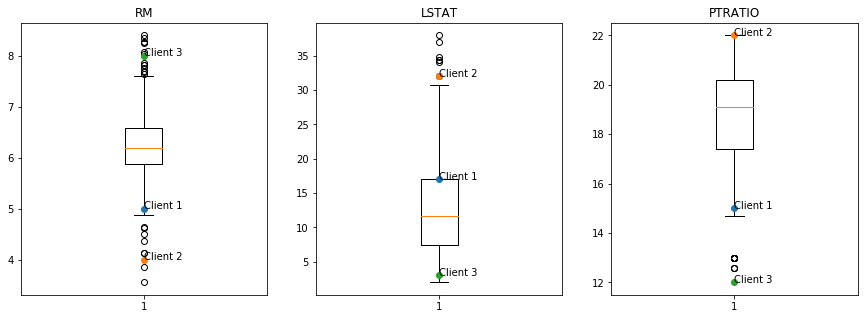

In [31]:
# Gerar uma matriz para os dados do cliente
client_data = [[5, 17, 15], # Cliente 1
               [4, 32, 22], # Cliente 2
               [8, 3, 12]]  # Cliente 3

# Mostrar estimativas
for i, price in enumerate(reg.predict(client_data)):
    print("Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price))

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.title(col)
    for j in range(3):
        plt.plot(1, client_data[j][i], marker='o')
        plt.annotate('Client %s' % str(j+1), xy=(1, client_data[j][i]))

**Resposta:**

Com base nos boxplots podemos obter a seguinte análise de cada cliente para cada variável:

RM: Podemos observar que o cliente 2 possuí um imóvel com 4 cômodos, o que faz dele um outlier por estar muito abaixo do ponto mínimo. O cliente 1 possuí um imóvel com 2 cômodos, ambos (cliente 1 e 2) possuem um número de cômodos bem abaixo da mediana, que é em torno de 6. Já o cliente 3 que possuí uma casa com 8 cômodos, bem acima da mediana, o que faz desse número um outlier.

LSTAT: O cliente 3 mora em uma região com poucos proletáriados, valor abaixo de 5% e bem abaixo da mediana que é aproximadamente 12%. Já o cliente 1 mora exatamente onde a proporção representa o 3º quartil, representado pela porcentagem aproximada de 17,5. Dos três clientes, o que mora em uma região com o maior índice de proletariados é o cliente 2, representado pela porcentagem aproximada de 32,5, porcentagem considerada um outlier.

PTRATIO: A razão de estudantes para professores na região onde se encontra o cliente 3 é de 12 por 1, um número abaixo do mínimo que é 15, fazendo com que esse número seja um outlier. Já na região onde está o imóvel do cliente 1, essa proporção é de 15 alunos para cada professor. A proporção do cliente 2 é quase o dobro da proporção do cliente 1, sendo 22 alunos para cada professor, exatamente no ponto máximo de nosso boxplot.

Levando em consideração as análises feitas acima, temos a seguinte classificação de clientes para a melhor pontuação em cada variável:

   * RM
          1º Cliente 3
          2º Cliente 1
          3º Cliente 2
          
          
   * LSTAT
          1º Cliente 3
          2º Cliente 1
          3º Cliente 2


   * PTRATIO
          1º Cliente 3
          2º Cliente 2
          3º Cliente 1

Essa ordem de classificação reflete totalmente nos preços sugeridos, que são, em ordem decrescente:

* Cliente 3 = $931,636.36
 
* Cliente 1 = $403,025.00

* Cliente 2 = $237,478.72

Com essas informações podemos chegar a conclusão de que os valores segeridos estão coerentes, isso devido fato de que os resultados foram totalmente estimados em função do valor dos atributos de cada cliente.

### Sensibilidade
Um modelo ótimo não é necessariamente um modelo robusto. Às vezes, um modelo é muito complexo ou muito simples para generalizar os novos dados. Às vezes, o modelo pode utilizar um algoritmo de aprendizagem que não é apropriado para a estrutura de dados especificado. Outras vezes, os próprios dados podem ter informação excessiva ou exemplos insuficientes para permitir que o modelo apreenda a variável alvo – ou seja, o modelo não pode ser ajustado.

** Execute a célula de código abaixo para rodar a função `fit_model` dez vezes com diferentes conjuntos de treinamento e teste para ver como as estimativas para um cliente específico mudam se os dados foram treinados.**

In [32]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Questão 11 - Aplicabilidade
* Em poucas linhas, argumente se o modelo construído deve ou não ser utilizado de acordo com as configurações do mundo real.

**Dica:** Olhe os valores calculados acima. Algumas questões para responder:
* Quão relevante dados coletados em 1978 podem ser nos dias de hoje? A inflação é importante?
* Os atributos presentes são suficientes para descrever um imóvel?
* Esse modelo é robusto o suficiente para fazer estimativas consistentes?
* Dados coletados em uma cidade urbana como Boston podem ser aplicados para uma cidade rural?
* É justo julgar o preço de um único imóvel baseado nas características de todo o bairro?

**Resposta:**

Os dados de 1978 por si só não refletem de forma alguma a realidade atual. Para que esses dados tenham serventia em uma utilização nos dias de hoje, minimamente deve ser levada em consideração a inflação presente desde ano de 1978 até a data atual para que seja possível haver um ajuste aproximado do preço desses imóveis. Outro fatores tão importante quanto a inflação devem ser levados em conta, como: a densidade populacional, mobilidade, acessibilidade, taxa de crimes entre outros

Os atributos utilizados na predição do modelo são importantes para a definição do modelo, mas poderiamos ter utilizados outros atributos como: idade do imóvel, tamanho do imóvel, capacidade da garagem, entre outros atributos. Isso faria com que o modelo fosse mais preciso e generalizasse melhor os dados.

O modelo faz estimativas consistentes, mas está totalmente limitado aos dados coletados e aos atributos utilizados para as tomadas de decisões, ambos fatores que podem e devem ser melhorados.

Os dados coletados em uma área urbana não podem ser aplicados em uma cidade rural por diversos fatores. O público é totalmente diferente, os imóveis possuem características distintas entre outras particularidades. A utilização de um modelo treinado em uma região, resultária em um grande índice de erro quando testado em uma outra região totalmente diferente.

O bairro influencia muito no valor do imóvel, mas de forma alguma é um fator definitivo para determinar o preço do imóvel. Em uma região com casas populares podemos encontrar outras casa populares semelhantes, assim como as que estão no entorno, mas ao mesmo tempo também podemos encontrar casas maiores e com mais atrativos em relação as demais casas da vizinhança, fazendo com que o preço dessa casa seja maior do que o das demais.

> **Nota**: Uma vez que você tenha completado todos os códigos e respondido todas as questões acima, você pode finalizar seu trabalho exportando o iPython Notebook como um documento HTML.
Você pode fazer isso usando o menu acima e navegando até
* **File -> Download as -> HTML (.html)**
* **Arquivo -> Download como -> HTML (.html)**

> Inclua o documento gerado junto com esse notebook na sua submissão.